In [29]:
from time_series_generator import TimeSeriesGenerator
from time_series_ddpm_model import TimeSeriesDDPM
import numpy as np
from statsmodels.tsa import ar_model
import matplotlib.pyplot as plt

In [39]:
series=TimeSeriesGenerator.generate_ar_series(10000, 1000, 1, 0.6,0.1).numpy()

In [23]:
series

array([[[ 1.7256988 ],
        [ 1.0175881 ],
        [ 0.6006764 ],
        ...,
        [-0.15198678],
        [-0.15238886],
        [-0.12920216]],

       [[ 0.7515613 ],
        [ 0.4146905 ],
        [ 0.15582345],
        ...,
        [-0.03558858],
        [ 0.01055128],
        [ 0.1480812 ]],

       [[-0.4858277 ],
        [-0.41505435],
        [-0.10037914],
        ...,
        [ 0.05278467],
        [ 0.00445944],
        [-0.13308254]],

       ...,

       [[ 0.05602714],
        [ 0.02893111],
        [ 0.0988649 ],
        ...,
        [ 0.15622847],
        [ 0.19659364],
        [ 0.04840937]],

       [[ 1.0288144 ],
        [ 0.5282499 ],
        [ 0.4567814 ],
        ...,
        [ 0.07822607],
        [ 0.03124567],
        [ 0.01432324]],

       [[ 1.0460473 ],
        [ 0.59875524],
        [ 0.45604542],
        ...,
        [ 0.12123924],
        [ 0.1634879 ],
        [ 0.23054773]]], shape=(10, 1000, 1), dtype=float32)

In [8]:
tsmodel=ar_model.AutoReg(series, 1, trend='n')

In [9]:
result=tsmodel.fit()

In [10]:
series[0]

array([-1.0260658], dtype=float32)

In [11]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                     AutoReg(1)   Log Likelihood                 903.972
Method:               Conditional MLE   S.D. of innovations              0.098
Date:                Sat, 08 Mar 2025   AIC                          -1803.943
Time:                        10:39:29   BIC                          -1794.130
Sample:                             1   HQIC                         -1800.213
                                 1000                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
y.L1           0.5818      0.024     23.821      0.000       0.534       0.630
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7188           +0.0000j            1.7188            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
result.params[0]

np.float64(0.5818134482250447)

Parece que lo que me interesa, el phi, es lo que pone de y.L1. Aun no tengo muy claro que es el const. Preguntar a ChatGPT.
Siguiente paso es crear una funcion que guarde el phi para muchas series y cree un histograma. Asi podre comparar los histogramas para las series generadas, y para las series de entrenamiento.

In [33]:
def parameter_estimation(series):
    params_list=[]
    for serie in series:
        tsmodel=ar_model.AutoReg(serie, 1, trend='n')
        result=tsmodel.fit()
        params_list.append(result.params[0])
    return params_list

In [40]:
params=parameter_estimation(series)

In [35]:
params

[np.float64(0.6066138860842155),
 np.float64(0.5942954995805478),
 np.float64(0.5922986647113315),
 np.float64(0.5977995881893061),
 np.float64(0.6315382281019967),
 np.float64(0.614451060535328),
 np.float64(0.6274532910765136),
 np.float64(0.6036254550936251),
 np.float64(0.5659076787742022),
 np.float64(0.5860873762324527),
 np.float64(0.5753224284359529),
 np.float64(0.6209293873788176),
 np.float64(0.6000519083365323),
 np.float64(0.5821814126995525),
 np.float64(0.6066575681506832),
 np.float64(0.5932694870289543),
 np.float64(0.60118096458876),
 np.float64(0.5888290603908645),
 np.float64(0.5901866710995526),
 np.float64(0.6158547443561789),
 np.float64(0.5518427763452982),
 np.float64(0.5977722968615912),
 np.float64(0.5813780509018854),
 np.float64(0.5977263844798446),
 np.float64(0.6262610450986764),
 np.float64(0.6438578677195975),
 np.float64(0.6361249007976195),
 np.float64(0.6072291651051358),
 np.float64(0.634043488883562),
 np.float64(0.6217958882798795),
 np.float64(0.

(array([  1.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   4.,
          0.,   2.,   3.,   4.,   2.,   1.,   8.,  11.,  10.,   9.,  13.,
         20.,  20.,  24.,  28.,  24.,  41.,  42.,  39.,  54.,  48.,  65.,
         77.,  91., 108., 108., 126., 128., 138., 155., 163., 176., 203.,
        238., 240., 246., 275., 266., 287., 272., 282., 290., 266., 318.,
        328., 317., 271., 305., 284., 280., 285., 277., 268., 237., 245.,
        221., 194., 171., 191., 164., 143., 116., 103., 106.,  81.,  84.,
         79.,  54.,  54.,  37.,  27.,  27.,  29.,  16.,  16.,  10.,   9.,
          8.,  13.,   5.,   4.,   3.,   3.,   2.,   0.,   1.,   0.,   0.,
          1.]),
 array([0.49642296, 0.49829205, 0.50016114, 0.50203024, 0.50389933,
        0.50576842, 0.50763751, 0.5095066 , 0.51137569, 0.51324478,
        0.51511387, 0.51698297, 0.51885206, 0.52072115, 0.52259024,
        0.52445933, 0.52632842, 0.52819751, 0.53006661, 0.5319357 ,
        0.53380479, 0.53567388, 0.53754297, 0.

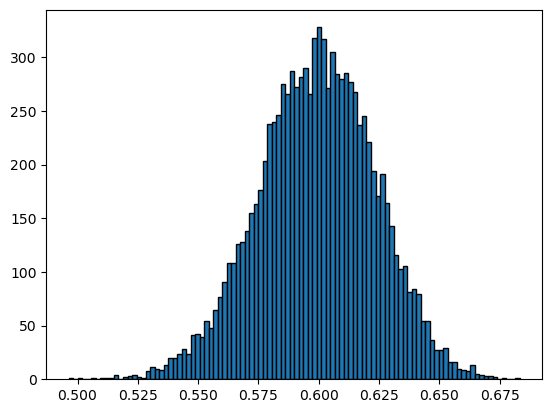

In [41]:
plt.hist(params, bins=100, edgecolor='black')